In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('haberman.csv')


In [ ]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df.columns = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

In [ ]:
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df.info()

    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.isnull().sum()

patient_age                0
operation_year             0
positive_axillary_nodes    0
survival_status            0
dtype: int64

In [ ]:
df['positive_axillary_nodes'].skew(axis=0,skipna=True)#checking skewness

2.9776817337612087

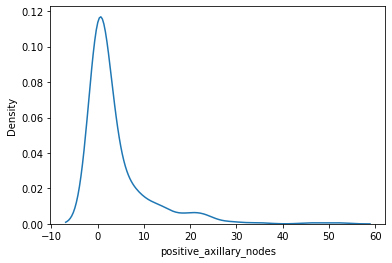

In [ ]:
sns.kdeplot(df['positive_axillary_nodes'])

In [ ]:
df['positive_axillary_nodes']=np.log(df['positive_axillary_nodes'])#log tranformation

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


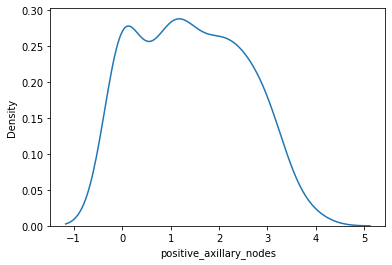

In [ ]:

sns.kdeplot(df['positive_axillary_nodes'])


In [ ]:
df['positive_axillary_nodes'].skew(axis=0,skipna=True)

nan

In [ ]:
df['survival_status'].value_counts()#to check whether target column is unbalanced

1    224
2     81
Name: survival_status, dtype: int64

In [ ]:
from sklearn.utils import resample
negative = df[df['survival_status']==1]
positive = df[df['survival_status']==2]#separating majority and minority class



In [ ]:
print(negative)
      

     patient_age  operation_year  positive_axillary_nodes  survival_status
0             30              62                 1.098612                1
1             30              65                     -inf                1
2             31              59                 0.693147                1
3             31              65                 1.386294                1
4             33              58                 2.302585                1
..           ...             ...                      ...              ...
297           73              68                     -inf                1
299           74              63                     -inf                1
300           75              62                 0.000000                1
301           76              67                     -inf                1
302           77              65                 1.098612                1

[224 rows x 4 columns]


In [ ]:
print(positive)

     patient_age  operation_year  positive_axillary_nodes  survival_status
6             34              59                     -inf                2
7             34              66                 2.197225                2
23            38              69                 3.044522                2
33            39              66                     -inf                2
42            41              60                 3.135494                2
..           ...             ...                      ...              ...
285           70              58                 1.386294                2
292           72              63                     -inf                2
298           74              65                 1.098612                2
303           78              65                 0.000000                2
304           83              58                 0.693147                2

[81 rows x 4 columns]


RESAMPLING(UNDERSAMPLING)

In [ ]:
# upsample minority
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=0) 

upsampled = pd.concat([negative, pos_upsampled])

In [ ]:
print(upsampled )

     patient_age  operation_year  positive_axillary_nodes  survival_status
0             30              62                 1.098612                1
1             30              65                     -inf                1
2             31              59                 0.693147                1
3             31              65                 1.386294                1
4             33              58                 2.302585                1
..           ...             ...                      ...              ...
107           48              58                 2.397895                2
166           54              60                 2.397895                2
268           66              61                 2.564949                2
155           53              58                 1.386294                2
230           61              68                 0.000000                2

[448 rows x 4 columns]


In [ ]:
# check new class counts
print(upsampled ["survival_status"].value_counts())

1    224
2    224
Name: survival_status, dtype: int64


In [ ]:
corr=df.corr()
corr

,patient_age,operation_year,positive_axillary_nodes,survival_status
patient_age,1.000000,0.092623,-0.046513,0.064351
operation_year,0.092623,1.000000,0.088048,-0.004076
positive_axillary_nodes,-0.046513,0.088048,1.000000,0.274848
survival_status,0.064351,-0.004076,0.274848,1.000000


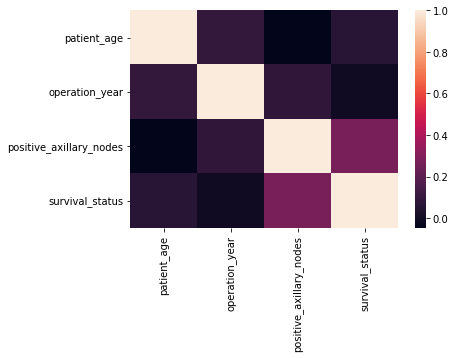

In [ ]:
sns.heatmap(corr)

In [ ]:
bins = [0,18, 30,60, 100]
df['patient_age1'] = pd.cut(df['patient_age'], bins)
print(df['patient_age1'])

0       (18, 30]
1       (18, 30]
2       (30, 60]
3       (30, 60]
4       (30, 60]
         ...    
300    (60, 100]
301    (60, 100]
302    (60, 100]
303    (60, 100]
304    (60, 100]
Name: patient_age1, Length: 305, dtype: category
Categories (4, interval[int64, right]): [(0, 18] < (18, 30] < (30, 60] < (60, 100]]


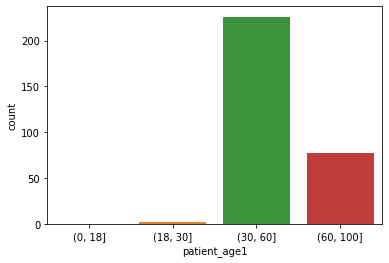

In [ ]:
sns.countplot(x=df.patient_age1)

In [ ]:
df[['patient_age','operation_year']].groupby(['patient_age']).mean()

,operation_year
patient_age,
30,63.500000
31,62.000000
33,59.000000
34,61.571429
35,63.500000
36,64.500000
37,60.500000
38,63.300000
39,62.666667


In [ ]:
c=df['patient_age1'].value_counts()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4011: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))


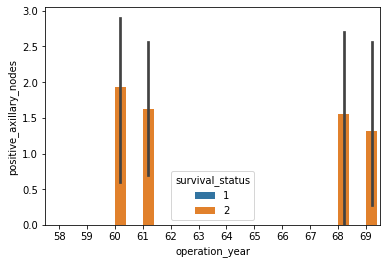

In [44]:
sns.barplot(x=df.operation_year,y=df.positive_axillary_nodes,hue=df.survival_status)

In [ ]:
pd.crosstab(df['operation_year'],df.survival_status,margins=True)

survival_status,1,2,All
operation_year,,,
58,24,12,36
59,18,9,27
60,24,4,28
61,23,3,26
62,16,7,23
63,22,8,30
64,22,8,30
65,15,13,28
66,22,6,28


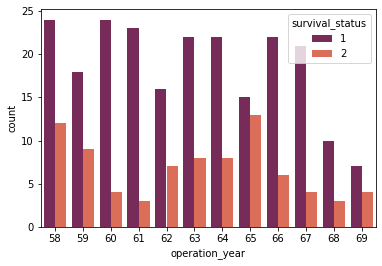

In [49]:
sns.countplot(x='operation_year',hue='survival_status',data=df,palette='rocket')

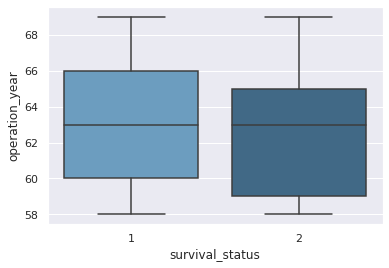

In [55]:
sns.set(style="darkgrid")
 
sns.boxplot(x ='survival_status', y ='operation_year', data = df,palette='Blues_d')